In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('twitter_climate_data.csv',sep=',')

In [3]:
data.head()

,sentiment,message,tweetid
0,-1.0,@tiniebeany climate change is an interesting h...,7.919170e+17
1,1.0,RT @NatGeoChannel: Watch #BeforeTheFlood right...,7.931140e+17
2,1.0,Fabulous! Leonardo #DiCaprio's film on #climat...,7.931140e+17
3,1.0,RT @Mick_Fanning: Just watched this amazing do...,7.931150e+17
4,1.0,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",7.931150e+17


In [4]:
data.shape

(43943, 3)

In [5]:
data.drop(data[data['message'].isna()].index, inplace=True)
data.drop(data[data['sentiment'].isna()].index, inplace=True)

In [6]:
data.shape
sentiment_map={-1:'negative',1:'positive',0:'neutral'}
data.insert(2,'sentiment_name',[sentiment_map[s] for s in data.sentiment],True)
#data['sentiment_int']=[sentiment_map[s] for s in data.sentiment]


In [7]:

data.head()

,sentiment,message,sentiment_name,tweetid
0,-1.0,@tiniebeany climate change is an interesting h...,negative,7.919170e+17
1,1.0,RT @NatGeoChannel: Watch #BeforeTheFlood right...,positive,7.931140e+17
2,1.0,Fabulous! Leonardo #DiCaprio's film on #climat...,positive,7.931140e+17
3,1.0,RT @Mick_Fanning: Just watched this amazing do...,positive,7.931150e+17
4,1.0,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",positive,7.931150e+17


In [9]:
#labeling
import numpy as np

reviews = np.array(data['message'])[:]
labels = np.array(data['sentiment_name'])[:]

In [10]:
from collections import Counter

Counter(labels)

Counter({'negative': 3568, 'positive': 29819, 'neutral': 6811})

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import csv

def preProcessor(Tweet):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-]+(?:(?:\.[\w\-]+)+))([\w\-\.,@?^=%&:/\+#]*[\w\-\@?^=%&/\+#])?', ' ', Tweet)
    text=re.sub(r'['+punctuation+']',' ',Tweet)
    text=re.sub(r'#(\w+)',' ',Tweet)
    text=re.sub(r'@(\w+)',' ',Tweet)
    #print(token.tokenize(text))
    return Tweet

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
#text_counts=cv.fit_transform(data['Tweet'])
text_counts=cv.fit_transform(data['message'].values.astype('U'))

In [12]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment_name'],test_size=0.3)

In [13]:
from sklearn.naive_bayes import *
from sklearn import metrics

clf=MultinomialNB()
#clf_gaus=GaussianNB()
#clf_ber=BernoulliNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.7936152570480929

In [14]:
#Ber_NB
clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.7617744610281924

In [16]:
from sklearn.svm import LinearSVC
from sklearn import metrics

clf=LinearSVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.8139303482587065

In [17]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 543  193  332]
 [ 102 1007  911]
 [ 118  588 8266]]
Normalized confusion matrix
[[0.51 0.18 0.31]
 [0.05 0.5  0.45]
 [0.01 0.07 0.92]]


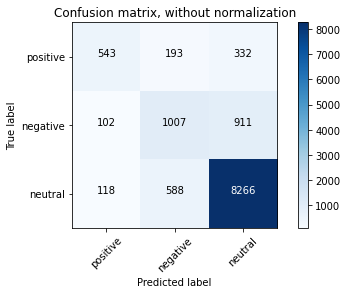

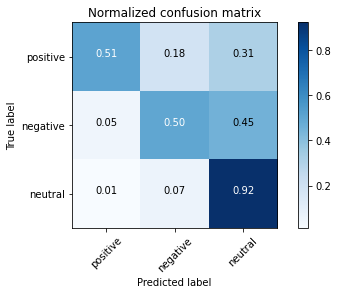

NameError: name 'y_pred' is not defined

In [18]:
#linear
from sklearn.svm import LinearSVC
import sklearn
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)
metrics.accuracy_score(y_test, pred)
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()